# Acquisition

**4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.**

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [2]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools

import acquire
import prepare
from sklearn.model_selection import train_test_split

np.random.seed(95)

In [3]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
iris.shape # look at the shape of that data

(150, 5)

In [7]:
iris.columns # look at the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
iris.dtypes # looke at the data types of each column

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
iris.describe() # discriptive statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**5. Read the data from this google sheet into a dataframe, df_google.**

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [10]:
# import form google sheets
action = "/export?format=csv&gid="
url = f"https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g{action}341089357"

google_sheet_data = pd.read_csv(url)

In [15]:
google_sheet_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
# select only integer datatypes
google_sheet_data_num_col = google_sheet_data.select_dtypes("number")

# remove the paragerid 
google_sheet_data_numerics = google_sheet_data[google_sheet_data_num_col.columns[1:]]
google_sheet_data_numerics.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [20]:
google_sheet_data.shape # look at the shape of the data

(891, 12)

In [22]:
google_sheet_data.columns # look at all the columns of the data

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
google_sheet_data.dtypes # look at the data types of the data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
google_sheet_data.describe() # discriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.**

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

**To excel**

In [26]:
google_sheet_data.to_csv("google_sheet_data.csv") # transfer the previous data to csv


**remove utf-8**

In [27]:
def catch_encoding_errors(fileName) -> str:
    
    """
    parameters:
        fileName: csv file name. Should look like (file.csv)
    return:
        file dataframe with no encoding errors
    """
    # import needed
    from pandas import read_csv
    
    # list of encodings to check for
    encodings = ['utf-8', 'latin-1', 'cp1252', 'utf-16']
    
    # check encodings and return dataframe
    for encoding in encodings:
        try:
            df = pd.read_csv(fileName, encoding=encoding)
            break
        except UnicodeDecodeError:
            print(f"Failed to decode with {encoding} encoding.")
    return df

def get_existing_csv_file(fileName) -> str:
    """
    parameters:
        fileName: csv file name. Should look like (file.csv)
    return:
        file dataframe with no encoding errors after cheking for existance of file
    """
    if os.path.isfile(fileName):
        return catch_encoding_errors(fileName)
    else:
        print(f"file with name {fileName} does not exist.")

In [34]:
df = get_existing_csv_file("google_sheet_data.csv") # read existing csv files

# get a sample from the data frame
df_excel_sample= df.sample(100)
df_excel_sample.head(3)


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
614,614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
506,506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
643,643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S


In [35]:
df.shape

(891, 13)

In [37]:
df_excel_sample.select_dtypes("object").columns # columns of the sample data frme

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [39]:
# get numeric columns from the data frame
df_excel_sample_num_cols =df_excel_sample.select_dtypes("number")

# get ranges from the numeric smale columns
ranges = df_excel_sample_num_cols.max(axis=0) - df_excel_sample_num_cols.min(axis=0)
ranges

Unnamed: 0     884.0
PassengerId    884.0
Survived         1.0
Pclass           2.0
Age             64.0
SibSp            8.0
Parch            4.0
Fare           263.0
dtype: float64

### Section 2

**Make a new python module, acquire.py to hold the following data aquisition functions:**

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [26]:
titanic = acquire.get_titanic_data()

In [27]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [28]:
iris = acquire.get_iris_data()
iris.head()

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [29]:
telco_churn = acquire.get_telco()
telco_churn.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [44]:
def get_csv_from_codeup_database_(fileName, database_name= None, query= None) -> "str, str, str":
    """
    parameters:
        fileName: csv file name. Should look like (file.csv)
        database_name: optional paremeter if file already exist in the working directorry
        query: optional paremeter tha contains sql query you wish to retreive from the data codeup databse
    return:
        file dataframe with no encoding errors after cheking for existance of file
    """
    import env
    
    if os.path.isfile(fileName):
        return catch_encoding_errors(fileName)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql(query, env.get_db_access(database_name))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(fileName)

        # Return the dataframe to the calling code
        return df  

In [45]:
query = """
    SELECT *
    FROM species;
    """
get_csv_from_codeup_database_("iris.csv", "iris_db", query)

,Unnamed: 0,species_id,species_name
0,0,1,setosa
1,1,2,versicolor
2,2,3,virginica


In [46]:
query = """
    SELECT *
    FROM customers #payment_types
    JOIN contract_types ct USING(contract_type_id)
    JOIN internet_service_types ist USING(internet_service_type_id)
    JOIN payment_types pt USING(payment_type_id);
    """
get_csv_from_codeup_database_("telco.csv", "telco_churn", query).head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [40]:
 query = """
    SELECT *
    FROM passengers;
    """

get_csv_from_codeup_database_("titanic.csv", "titanic_db", query).head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [43]:
get_csv_from_codeup_database_("titanic.csv").head(2)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


# Prepare

# Tidy data

1. Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [34]:
attendance = pd.read_csv("untidy-data/attendance.csv")
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [35]:
# melt the wide data to long
#                              columns I want to keep
attendance = attendance.melt(id_vars="Unnamed: 0")
attendance = attendance.rename(columns={"Unnamed: 0":"name", "value":"attend_class"})
attendance.head(10)

,name,variable,attend_class
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [36]:
# split the variable column into year, month and day
split_var = attendance.variable.str.split("-", expand=True)
split_var.head(3)

,0,1,2
0,2018,01,01
1,2018,01,01
2,2018,01,01


In [37]:
# add the tree new columns to the attendace dataframe
attendance[["year", "month", "day"]] = split_var

attendance.head(2)

,name,variable,attend_class,year,month,day
0,Sally,2018-01-01,P,2018,01,01
1,Jane,2018-01-01,A,2018,01,01


In [38]:
# remoce the bad year column
attendance = attendance.drop(columns=["variable"], axis=1)

In [50]:
t=0.1
a = t * 10
p = 0.0
h= 0.5

condlist = [attendance.attend_class == "T", attendance.attend_class == "A", attendance.attend_class == "H", attendance.attend_class == "p"]
choicelist = [t, a, h, p]
att_score = np.select(condlist, choicelist)

attendance["attendance_score"] = att_score

In [51]:
attendance.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
name,Sally,Jane,Billy,John,Sally,Jane,Billy,John,Sally,Jane,Billy,John,Sally,Jane,Billy,John,Sally,Jane,Billy,John
attend_class,P,A,A,P,T,P,T,T,T,T,A,H,H,T,A,P,P,T,H,P
year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
month,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01
day,01,01,01,01,02,02,02,02,03,03,03,03,04,04,04,04,05,05,05,05
attendance_score,0.0,1.0,1.0,0.0,0.1,0.0,0.1,0.1,0.1,0.1,1.0,0.5,0.5,0.1,1.0,0.0,0.0,0.1,0.5,0.0


In [71]:
# attendance scores
1 - (attendance.groupby("name").attendance_score.agg("mean").sort_values())

name
John     0.9125
Sally    0.7625
Jane     0.6875
Billy    0.5250
Name: attendance_score, dtype: float64

2. Coffee Levels

- Read the coffee_levels table.
- Transform the data so that each carafe is in it's own column.
- Is this the best shape for the data?

In [58]:
coffee_levels = pd.read_csv("untidy-data/coffee_levels.csv")
coffee_levels.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [63]:
coffee_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           30 non-null     int64  
 1   coffee_carafe  30 non-null     object 
 2   coffee_amount  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [60]:
coffee_levels.coffee_carafe.value_counts()

x    10
y    10
z    10
Name: coffee_carafe, dtype: int64

In [94]:
coffee_levels.pivot_table(index= "hour", # value we want to keep as rows
                          columns="coffee_carafe", # value we taking up to columns
                          values= "coffee_amount")

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


3. Cake Recipes

- Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
- Tidy the data as necessary.
- Which recipe, on average, is the best?
- Which oven temperature, on average, produces the best results?
- Which combination of recipe, rack position, and temperature gives the best result?

In [100]:
cake_recipes = pd.read_csv("untidy-data/cake_recipes.csv")
cake_recipes.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [101]:
cake_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe:position  8 non-null      object 
 1   225              8 non-null      float64
 2   250              8 non-null      float64
 3   275              8 non-null      float64
 4   300              8 non-null      float64
dtypes: float64(4), object(1)
memory usage: 448.0+ bytes


In [102]:
cake_recipes.columns

Index(['recipe:position', '225', '250', '275', '300'], dtype='object')

In [105]:
cake_recipes['recipe:position'].value_counts()

a:bottom    1
a:top       1
b:bottom    1
b:top       1
c:bottom    1
c:top       1
d:bottom    1
d:top       1
Name: recipe:position, dtype: int64

In [106]:
# separate the unclean data to differenc columns
recip_sep = cake_recipes['recipe:position'].str.split(":", expand=True)
recip_sep.head()

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom


In [109]:
# remove the split column
cake_recipes = cake_recipes.drop(columns="recipe:position", axis=1)

# add the created columns to the cake data frame
cake_recipes[["recipe", "position"]]= recip_sep
cake_recipes.head(2)

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top


In [111]:
cols = cake_recipes.columns
cols

Index(['225', '250', '275', '300', 'recipe', 'position'], dtype='object')

In [118]:
# melt the wide format to long of the tempretures
cake_recipes = cake_recipes.melt(id_vars= ["recipe", "position"],
                  var_name="temperature",
                  value_name= 'tastiness'
                 )
cake_recipes.head()

,recipe,position,temperature,tastiness
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


In [126]:
# Which recipe, on average, is the best?
cake_recipes.groupby("recipe").tastiness.agg("mean").sort_values().tail(1)

recipe
b    76.736074
Name: tastiness, dtype: float64

In [129]:
# Which oven temperature, on average, produces the best results?
cake_recipes.groupby("temperature").tastiness.agg("mean").sort_values().tail(1)

temperature
275    74.886754
Name: tastiness, dtype: float64

# EDA

In [3]:
# acquire data
iris = acquire.get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [4]:
permutaions = list(itertools.permutations(iris.columns[2:],2))

In [6]:
train, validate, test = prepare.split_data_(df=iris, stratify_col="species_name", random_state=95)

In [9]:
train.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
76,77,6.8,2.8,4.8,1.4,2,2,versicolor
132,133,6.4,2.8,5.6,2.2,3,3,virginica
4,5,5.0,3.6,1.4,0.2,1,1,setosa


(array([ 6., 17.,  7., 17., 10., 10., 13.,  3.,  3.,  4.]),
 array([4.4 , 4.75, 5.1 , 5.45, 5.8 , 6.15, 6.5 , 6.85, 7.2 , 7.55, 7.9 ]),
 <BarContainer object of 10 artists>)

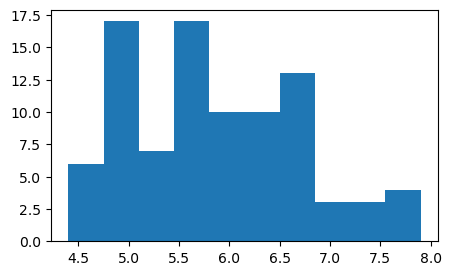

In [13]:
# separeate discrete from continuous variables
numeric_col = train.select_dtypes("number").columns

categorical_col = train.select_dtypes("object").columns

In [ ]:
for i in train_col[2:]:
    print(i.upper())
    print(i.value_counts())
    plt.figure(figsize=(5,3))
    plt.hist(train.sepal_length)